In [1]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


# 기술적 데이터 분석 (DDA) 

In [2]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [3]:
"""
이탈 x  13만
이탈 o  3만        -- 클래스 불균형 문제 
"""

df.Exited.value_counts()

0    130113
1     34921
Name: Exited, dtype: int64

In [4]:
"""
결측치는 존재하지 않음 

 0   id               
 1   CustomerId       
 2   Surname          
 3   CreditScore       신용 점수
 4   Geography         국가
 5   Gender            성별
 6   Age               나이
 7   Tenure            계좌 개설 기간
 8   Balance           잔액 
 9   NumOfProducts     이용중인 금융 산품의 수 
 10  HasCrCard         신용 카드 보유 여부
 11  IsActiveMember    활성 고객인지 (적극적 거래)
 12  EstimatedSalary   추정 연봉 
 13  Exited            
성
신용점수
지리학
성별
나이
보유
균형
제품 수


"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
exit_df = df.loc[df['Exited'] == 1]
no_exit_df = df.loc[df['Exited'] == 0]

In [6]:
"""
잔액(Balnace) 컬럼이 2범위수 50% 까지 0 => 분포를 살펴 볼 필요 
"""
round(df[['CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']].describe(),0)



,CreditScore,Tenure,Balance,NumOfProducts,EstimatedSalary
count,165034.0,165034.0,165034.0,165034.0,165034.0
mean,656.0,5.0,55478.0,2.0,112575.0
std,80.0,3.0,62818.0,1.0,50293.0
min,350.0,0.0,0.0,1.0,12.0
25%,597.0,3.0,0.0,1.0,74638.0
50%,659.0,5.0,0.0,2.0,117948.0
75%,710.0,7.0,119940.0,2.0,155152.0
max,850.0,10.0,250898.0,4.0,199992.0


# 탐색적 데이터 분석

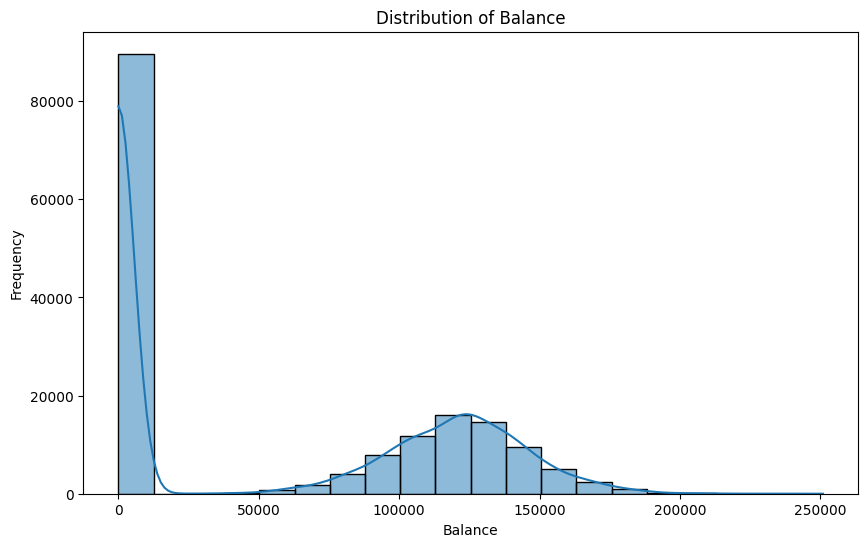

잔액이 0인 고객의 비율 0.54


In [7]:
"""
1) 잔액 컬럼에 대한 시각화 

앞서 언급한 잔액(Balnace) 컬럼에 대해 알아 보기 위해 hist 차트 시각화 

잔액이 0이 고객의 비율이 54% -> 분석 시 제외 고려 대상  


"""
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(df['Balance'], kde=True, bins=20)
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

print("잔액이 0인 고객의 비율" ,round(len(df.loc[df.Balance == 0]) / len(df),2) )

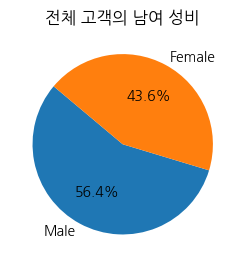

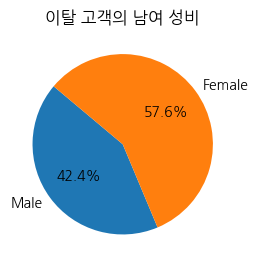

In [8]:
"""
2) 성별로 이탈 고객이 다를까 ? 

전제 고객 중 남성 고객의 비가 더 많지만 
여성의 이탈율이 더 많음



"""
from matplotlib import font_manager, rc

plt.rcParams['font.family'] = 'NanumGothic'


plt.subplot(1,2,1)
plt.pie(df.Gender.value_counts() , labels=df.Gender.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title("전체 고객의 남여 성비")
plt.show()


plt.subplot(1,2,2)
plt.pie(exit_df.Gender.value_counts().sort_values() , labels=df.Gender.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title("이탈 고객의 남여 성비")
plt.show()




  Geography  Total_Customers  Exited_Customers  Exit_Rate
0    France            94215             15572   0.165282
1   Germany            34606             13114   0.378952
2     Spain            36213              6235   0.172176


Text(0.5, 0, 'Geography')

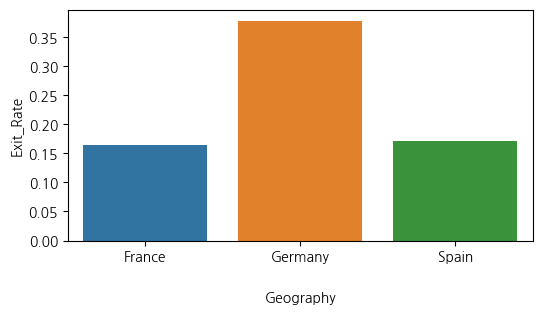

In [9]:
"""
3) 국가 별 이탈고객 현황 

독일 고객의 이탈율이 가장 높음
"""
total_counts = df['Geography'].value_counts()
exit_counts = df[df['Exited'] == 1]['Geography'].value_counts()

# 이탈율 계산
exit_rate = exit_counts / total_counts

result_df = pd.DataFrame({
    'Total_Customers': total_counts,
    'Exited_Customers': exit_counts,
    'Exit_Rate': exit_rate
}).reset_index().rename(columns={'index': 'Geography'})


print( result_df ) 


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
sns.barplot(x= result_df["Geography"] , y = result_df["Exit_Rate"] )

plt.xlabel('Geography', labelpad=20)


In [10]:
df.drop(columns=['id', 'CustomerId']).corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9696\2117576838.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop(columns=['id', 'CustomerId']).corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.008918,0.000942,0.006973,0.011361,-0.002828,0.014790,-0.001820,-0.027383
Age,-0.008918,1.000000,-0.010830,0.064318,-0.102195,-0.012111,0.003320,-0.005399,0.340768
Tenure,0.000942,-0.010830,1.000000,-0.009481,0.007335,0.005327,-0.005532,0.000971,-0.019565
Balance,0.006973,0.064318,-0.009481,1.000000,-0.361033,-0.018584,-0.015073,0.008586,0.129743
NumOfProducts,0.011361,-0.102195,0.007335,-0.361033,1.000000,0.005482,0.039736,-0.004285,-0.214554
HasCrCard,-0.002828,-0.012111,0.005327,-0.018584,0.005482,1.000000,-0.021034,0.004438,-0.022141
IsActiveMember,0.014790,0.003320,-0.005532,-0.015073,0.039736,-0.021034,1.000000,-0.008080,-0.210237
EstimatedSalary,-0.001820,-0.005399,0.000971,0.008586,-0.004285,0.004438,-0.008080,1.000000,0.018827
Exited,-0.027383,0.340768,-0.019565,0.129743,-0.214554,-0.022141,-0.210237,0.018827,1.000000


# 확증적 데이터 분석

In [11]:
"""
가설 

H0 : 이탈 고객 여부에 따라 추정 연봉간 차이는 존재하지 않는다  
H1 : 이탈 고객 여부에 따라 추정 연봉의 차이가 존재한다

단일 표본 T검정  (신뢰수준 : 95%) 
"""

from scipy.stats import ttest_ind


stat , p_value = ttest_ind(exit_df['EstimatedSalary']  , no_exit_df['EstimatedSalary'])


print(stat)
print(p_value)

if p_value > 0.05 : 
    print('귀무가설 기각')
else: print('귀무가설 기각 불가 = 유의미한 차이 없음 ')

7.649581965635489
2.027177371186941e-14
귀무가설 기각 불가 = 유의미한 차이 없음 


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


# 예측적 데이터 분석 PDA

In [13]:
"""
예측 대상 (=타겟변수) = 고객 이탈여부 (0/1)   => 분류 모델 적합 

분류 모델  : 로지스틱 회귀 , 의사결정 나무 , 랜덤포레스트 


모델 생성전 전처리

1) 결측치  => 없음
2) 인코딩 *
3) 표준화
"""

# 2) 인코딩 과정 대상 =  Geography(국가) , Gender(성별)

"""
만약 회귀 모델을 구축해야했다면 인코딩 후 숫자의 크고 작음이 모델에 반영되어선 안되기 때문에 원핫 인코딩을 사용했어야함
분류 모델에선 레이블 인코딩을 사용해도 무방 
"""
from sklearn.preprocessing import LabelEncoder 

encoder = LabelEncoder()

df['Geography']= encoder.fit_transform(df['Geography'])
df['Gender']= encoder.fit_transform(df['Gender'])



In [14]:
"""
모델 생성 전 데이터 전처리 
2) 피처 스케일링 
표준화  =  평균이 0 분산이 1인 값으로 변환 ,데이터가 정규성을 가질 떄 유용

min-max = 0~1사이 값을 가지게 함 , 데이터가 졍규성을 갖지 않을 때 사용 

스케일링을 적용할 컬럼


"""
from sklearn.preprocessing import StandardScaler

x = df.drop(columns=['id','CustomerId','Surname',"Exited"])  # 예측에 사용 할 독립변수들을 x로 정의하고 스케일링 진행
y = df['Exited']

scaler= StandardScaler()
 
x = scaler.fit_transform(x)
x


array([[ 0.14413459, -0.79422926,  0.87846546, ...,  0.57126293,
        -0.99555021,  1.36948561],
       [-0.36770579, -0.79422926,  0.87846546, ...,  0.57126293,
         1.00446968, -1.25408471],
       [ 0.2689737 , -0.79422926,  0.87846546, ...,  0.57126293,
        -0.99555021,  1.4374223 ],
       ...,
       [-1.14170832, -0.79422926,  0.87846546, ...,  0.57126293,
         1.00446968,  0.2953656 ],
       [-1.27903135,  1.65503511, -1.13834869, ..., -1.75050742,
         1.00446968, -0.82321653],
       [ 2.41620652, -0.79422926,  0.87846546, ...,  0.57126293,
        -0.99555021, -1.01392487]])

In [15]:
"""

#  분류 모델 생성

로지스틱 , 의사결정나무 , 랜덤포레스트

우선 하이퍼파라미터튜닝 없이 성능평가 

성능평가 지표는 분류에서 사용하는 혼동행렬과 , roc 점수로 종합적으로 판단

"""

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc



x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2024)
lrclf = LogisticRegression(solver="liblinear")
dt_clf= DecisionTreeClassifier(random_state=2024)
rf_clf = RandomForestClassifier(random_state=2024)

# 로지스틱 
lrclf.fit(x_train,y_train)
y_pred  = lrclf.predict(x_test)
report = classification_report(y_test, y_pred)
print("로지스틱\n\n",report)

# 의사결정

dt_clf.fit(x_train,y_train)
y_pred  = dt_clf.predict(x_test)
report = classification_report(y_test, y_pred)
print("의사결정나무\n\n",report)

# 랜덤포르세트
rf_clf.fit(x_train,y_train)
y_pred  = rf_clf.predict(x_test)
report = classification_report(y_test, y_pred)
print("랜덤포레스트\n\n",report)


로지스틱

               precision    recall  f1-score   support

           0       0.85      0.95      0.90     26031
           1       0.67      0.35      0.46      6976

    accuracy                           0.83     33007
   macro avg       0.76      0.65      0.68     33007
weighted avg       0.81      0.83      0.80     33007

의사결정나무

               precision    recall  f1-score   support

           0       0.87      0.87      0.87     26031
           1       0.52      0.54      0.53      6976

    accuracy                           0.80     33007
   macro avg       0.70      0.70      0.70     33007
weighted avg       0.80      0.80      0.80     33007

랜덤포레스트

               precision    recall  f1-score   support

           0       0.88      0.94      0.91     26031
           1       0.72      0.54      0.62      6976

    accuracy                           0.86     33007
   macro avg       0.80      0.74      0.77     33007
weighted avg       0.85      0.86      0.85     3

In [17]:
"""
하이퍼파라미터 튜닝 전 , 랜덤포레스트가 가장 좋은결과 

하이퍼파라미터 
"""
from sklearn.model_selection import GridSearchCV


# Logistic Regression
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}
lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5)
lr_gs.fit(x_train, y_train)
lr_best = lr_gs.best_estimator_
y_pred = lr_best.predict(x_test)
report = classification_report(y_test, y_pred)
print("로지스틱 (하이퍼파라미터 튜닝 후)\n\n", report)

C:\ProgramData\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


로지스틱 (하이퍼파라미터 튜닝 후)

               precision    recall  f1-score   support

           0       0.84      0.95      0.90     26031
           1       0.67      0.35      0.46      6976

    accuracy                           0.83     33007
   macro avg       0.76      0.65      0.68     33007
weighted avg       0.81      0.83      0.80     33007



In [19]:
# Decision Tree
dt_params = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_gs = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_gs.fit(x_train, y_train)
dt_best = dt_gs.best_estimator_
y_pred = dt_best.predict(x_test)
report = classification_report(y_test, y_pred)
print("의사결정나무 (하이퍼파라미터 튜닝 후)\n\n", report)




KeyboardInterrupt



In [20]:
# Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_gs = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_gs.fit(x_train, y_train)
rf_best = rf_gs.best_estimator_
y_pred = rf_best.predict(x_test)
report = classification_report(y_test, y_pred)
print("랜덤포레스트 (하이퍼파라미터 튜닝 후)\n\n", report)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

KeyboardInterrupt: 